### Complexity

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_scores = pd.read_csv("Test scores.csv", parse_dates=['Test taken date'])
test_master = pd.read_csv("Test master.csv")
test_participant = pd.read_csv("Audience summary.csv")

In [3]:
test_scores['weekday_name']  = test_scores['Test taken date'].dt.weekday_name
test_scores['month']  = test_scores['Test taken date'].dt.month_name() 
test_scores['week']  = test_scores['Test taken date'].dt.week-42 # to get number from 1 
test_master['maximum_score'] = test_master['No. of questions'] * test_master['Marks per question']
test_scores = pd.merge(test_scores,test_master,left_on="Test Name", right_on="Test name", how = "left")
cols = ['Participant identifier', 'Test Name', 'Track','Designation', 'Score', 
        'weekday_name', 'month', 'week','Complexity', 'maximum_score']
test_scores = test_scores[cols]
test_scores['Percent'] = round((test_scores['Score']/test_scores['maximum_score'])*100,2)

In [4]:
test_scores_easy = test_scores[test_scores['Complexity']=='Easy']
test_scores_medium = test_scores[test_scores['Complexity']=='Medium']
test_scores_hard = test_scores[test_scores['Complexity']=='Difficult']

Text(0.5, 1.05, 'Distribution of score percentage across track in test with easy complexity')

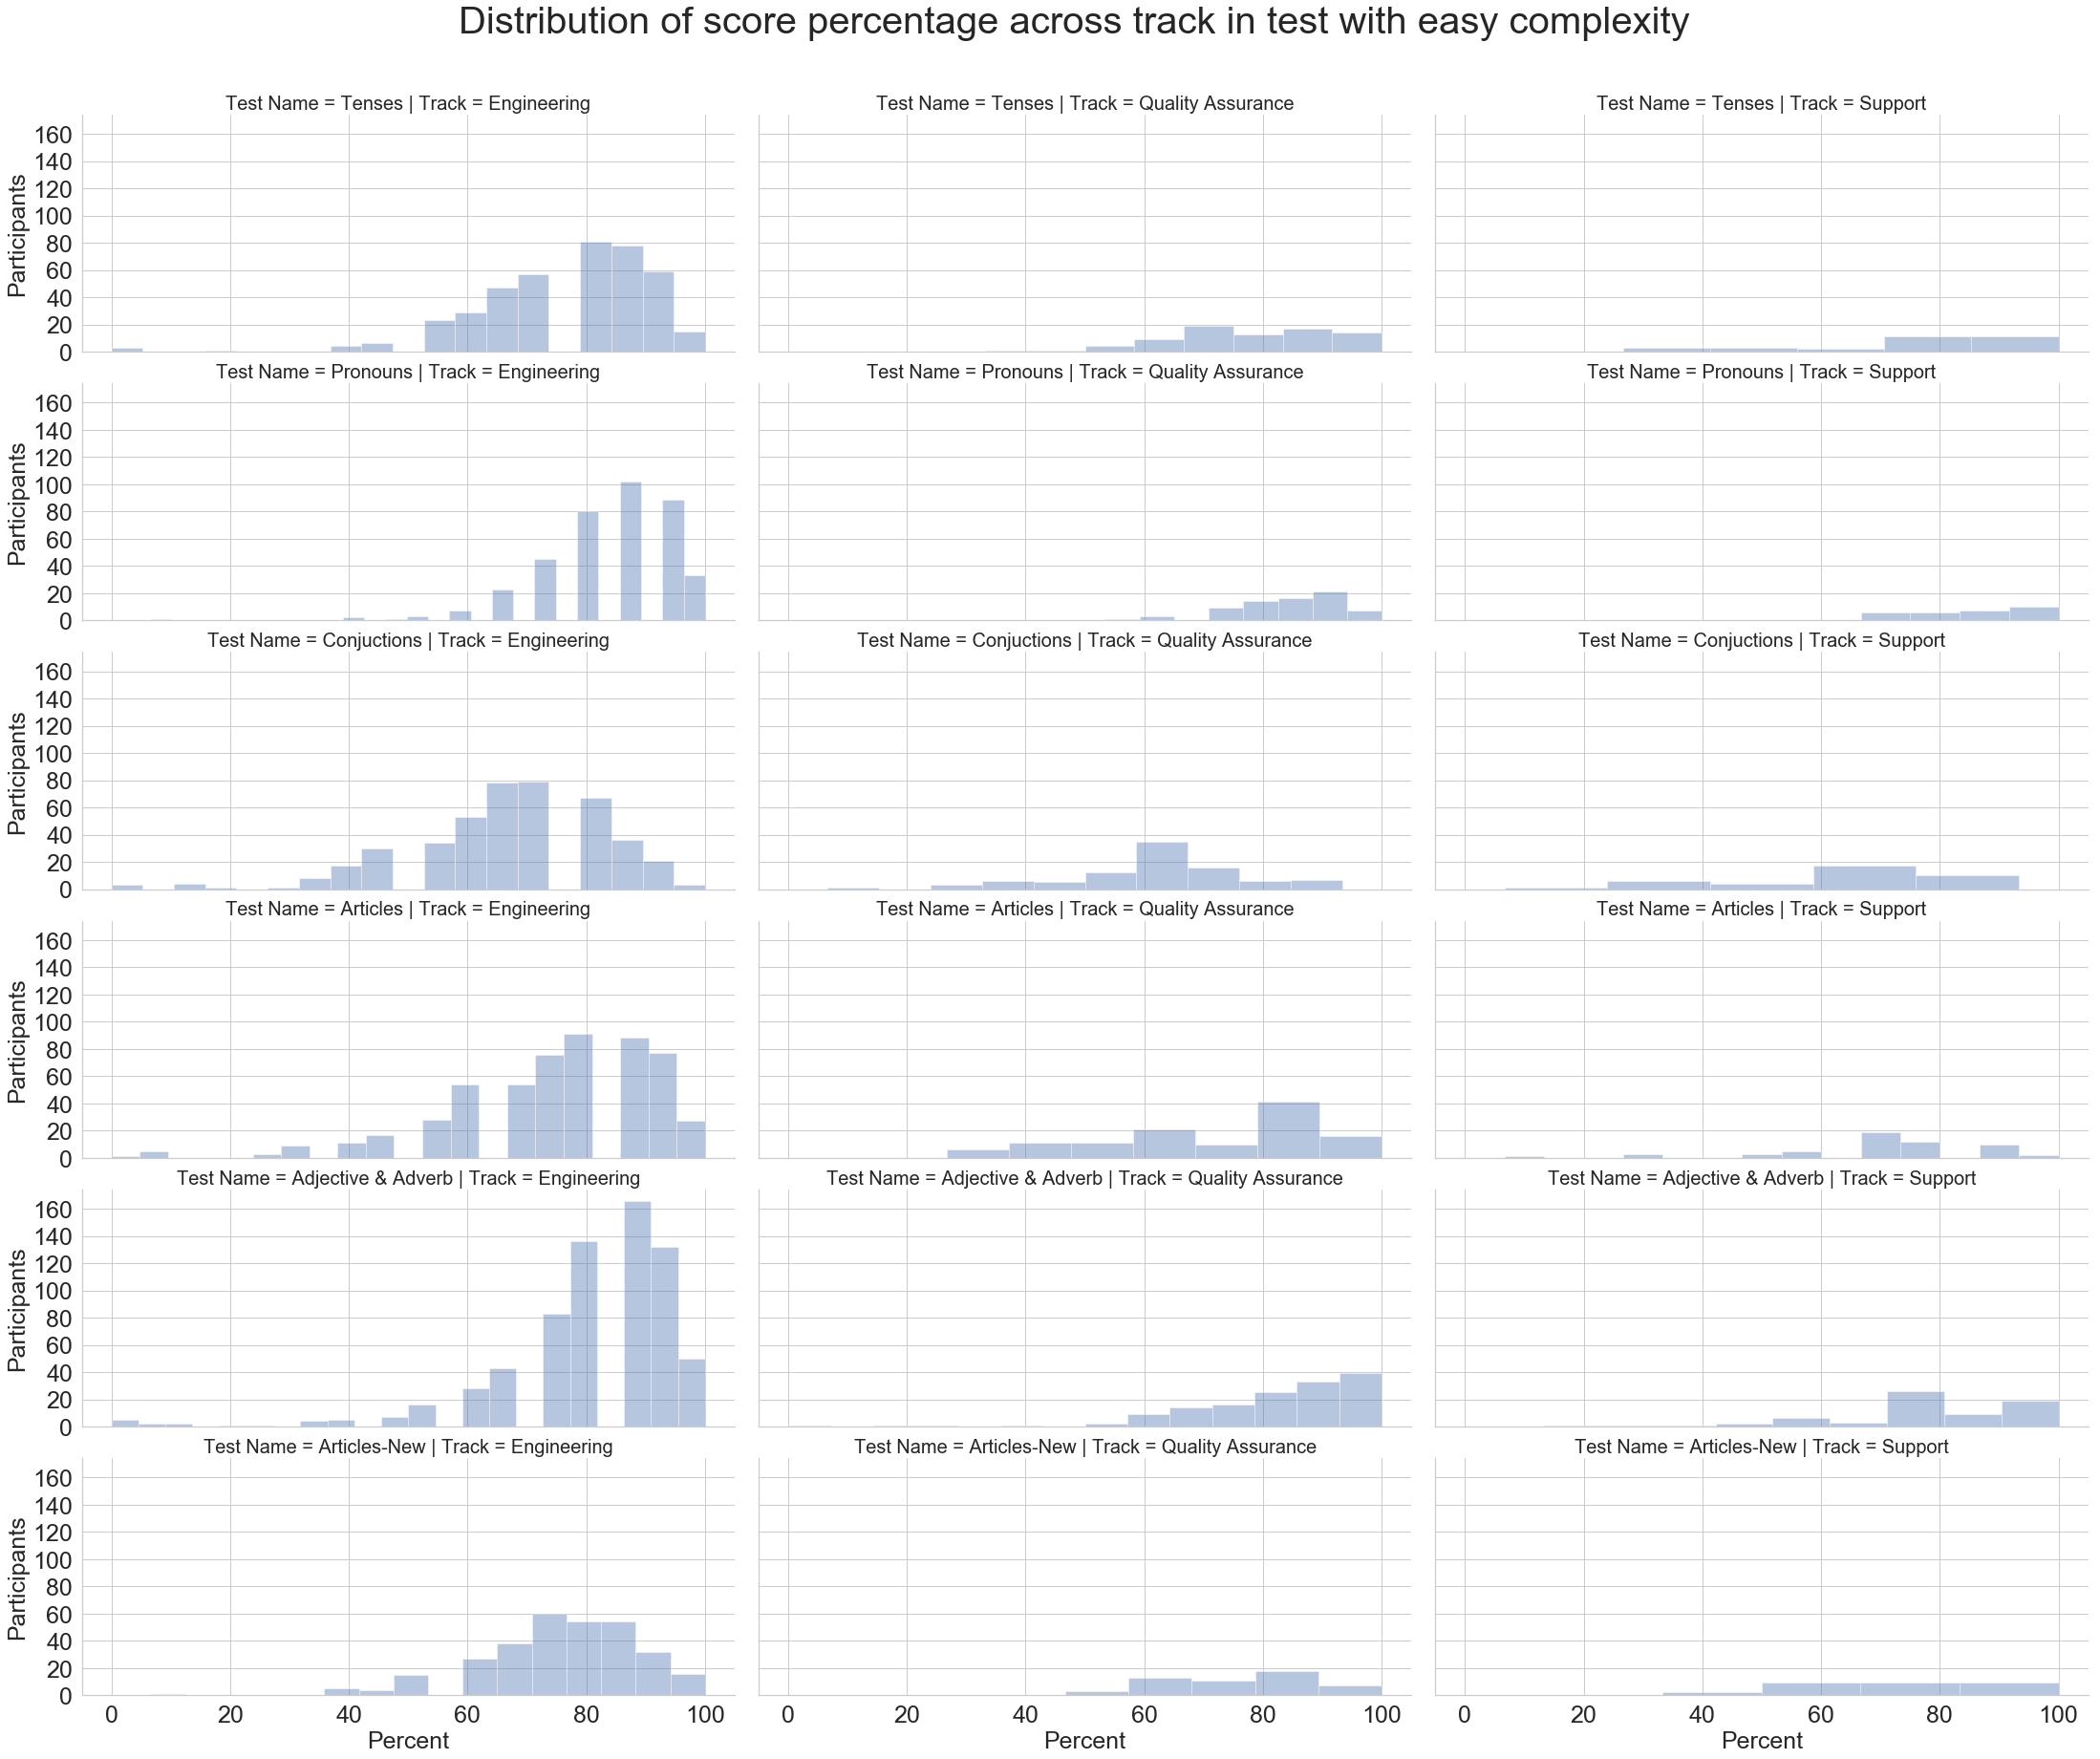

In [5]:
sns.set(style="whitegrid")
g = sns.FacetGrid(test_scores_easy, col='Track', row='Test Name', height = 4, aspect =2.5)
g.map(sns.distplot, "Percent", kde = False, hist = True, rug = False)
g.set_titles(size =20)
g.set_xlabels(size = 25)
g.set_ylabels(size = 25, label = "Participants")
g.set_yticklabels(fontsize =25)
g.set_xticklabels(fontsize =25, labels = [0,0,20,40,60,80,100])
g.fig.suptitle('Distribution of score percentage across track in test with easy complexity', fontsize=40, x = 0.5, y = 1.05)
#plb.savefig('Distribution_easy.png',dpi=50,bbox_inches='tight')

Text(0.5, 1.05, 'Distribution of score percentage across track in test with medium complexity')

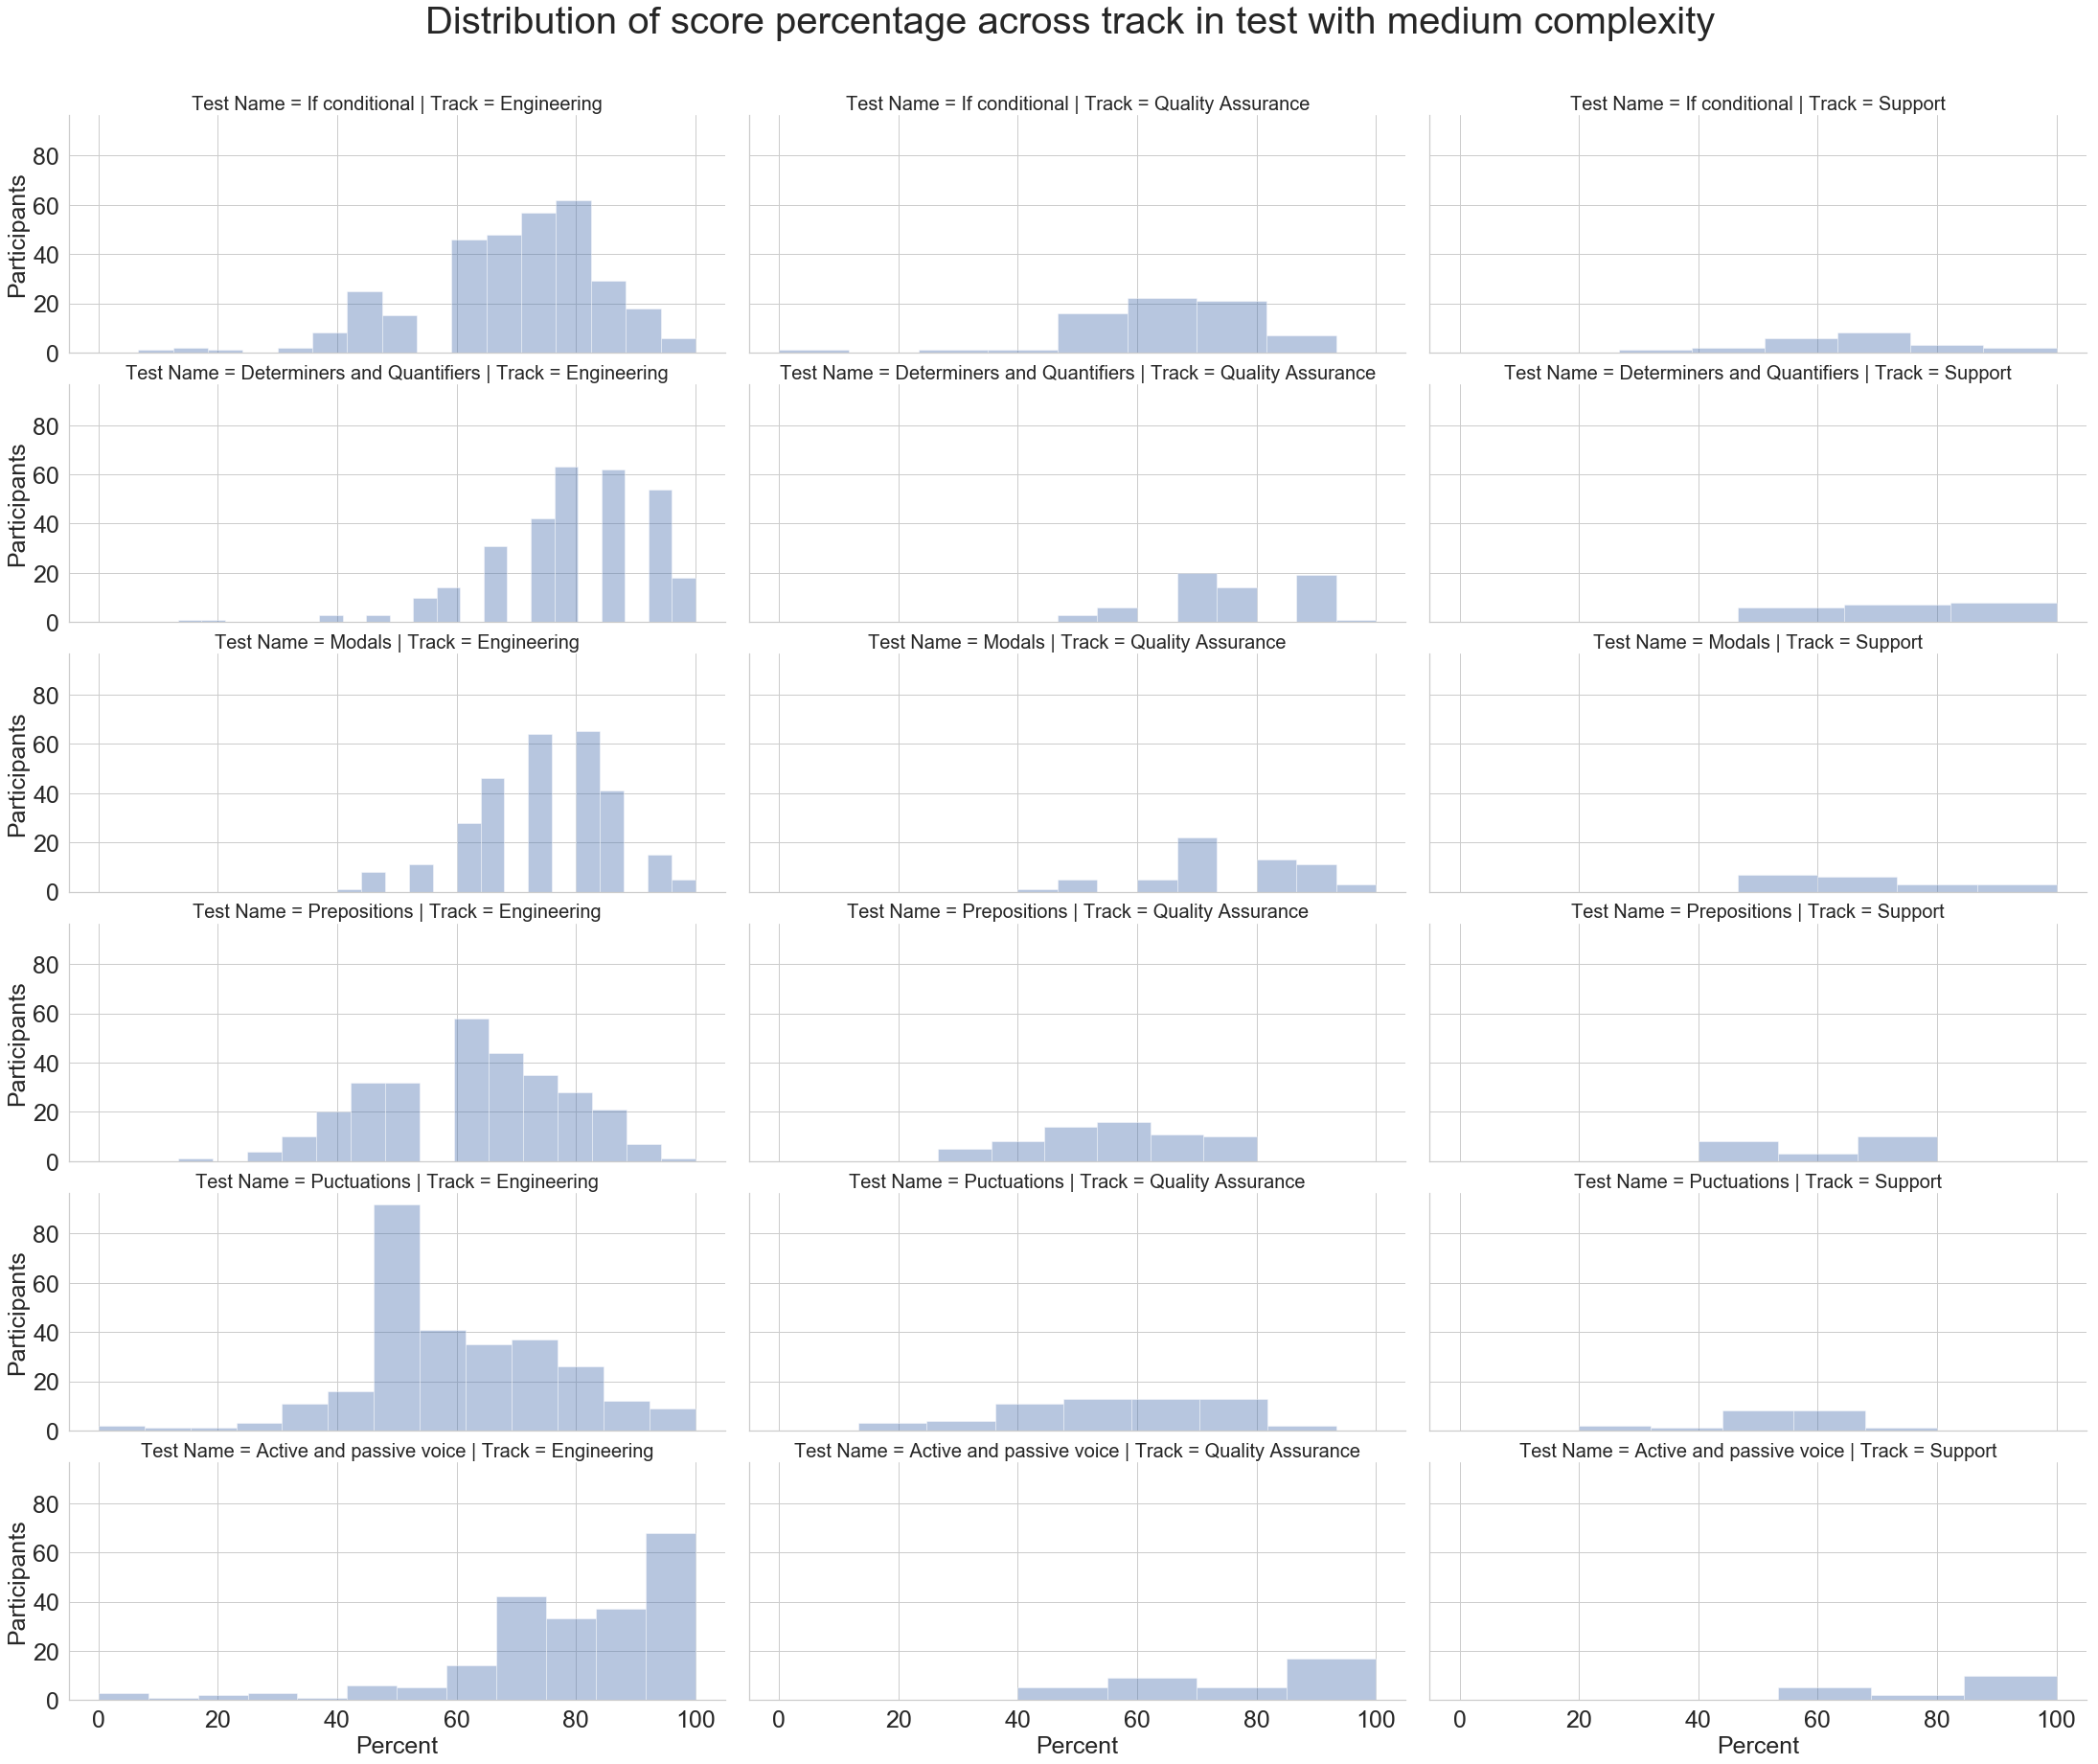

In [6]:
sns.set(style="whitegrid")
g = sns.FacetGrid(test_scores_medium, col='Track', row='Test Name', height = 4, aspect =2.5)
g.map(sns.distplot, "Percent", kde = False, hist = True, rug = False)
g.set_titles(size =20)
g.set_xlabels(size = 25)
g.set_ylabels(size = 25, label = "Participants")
g.set_yticklabels(fontsize =25)
g.set_xticklabels(fontsize =25, labels = [0,0,20,40,60,80,100])
g.fig.suptitle('Distribution of score percentage across track in test with medium complexity', fontsize=40, x = 0.5, y = 1.05)
#plb.savefig('Distribution_medium.png',dpi=50,bbox_inches='tight')

Text(0.5, 1.05, 'Distribution of score percentage across track in test with difficult complexity')

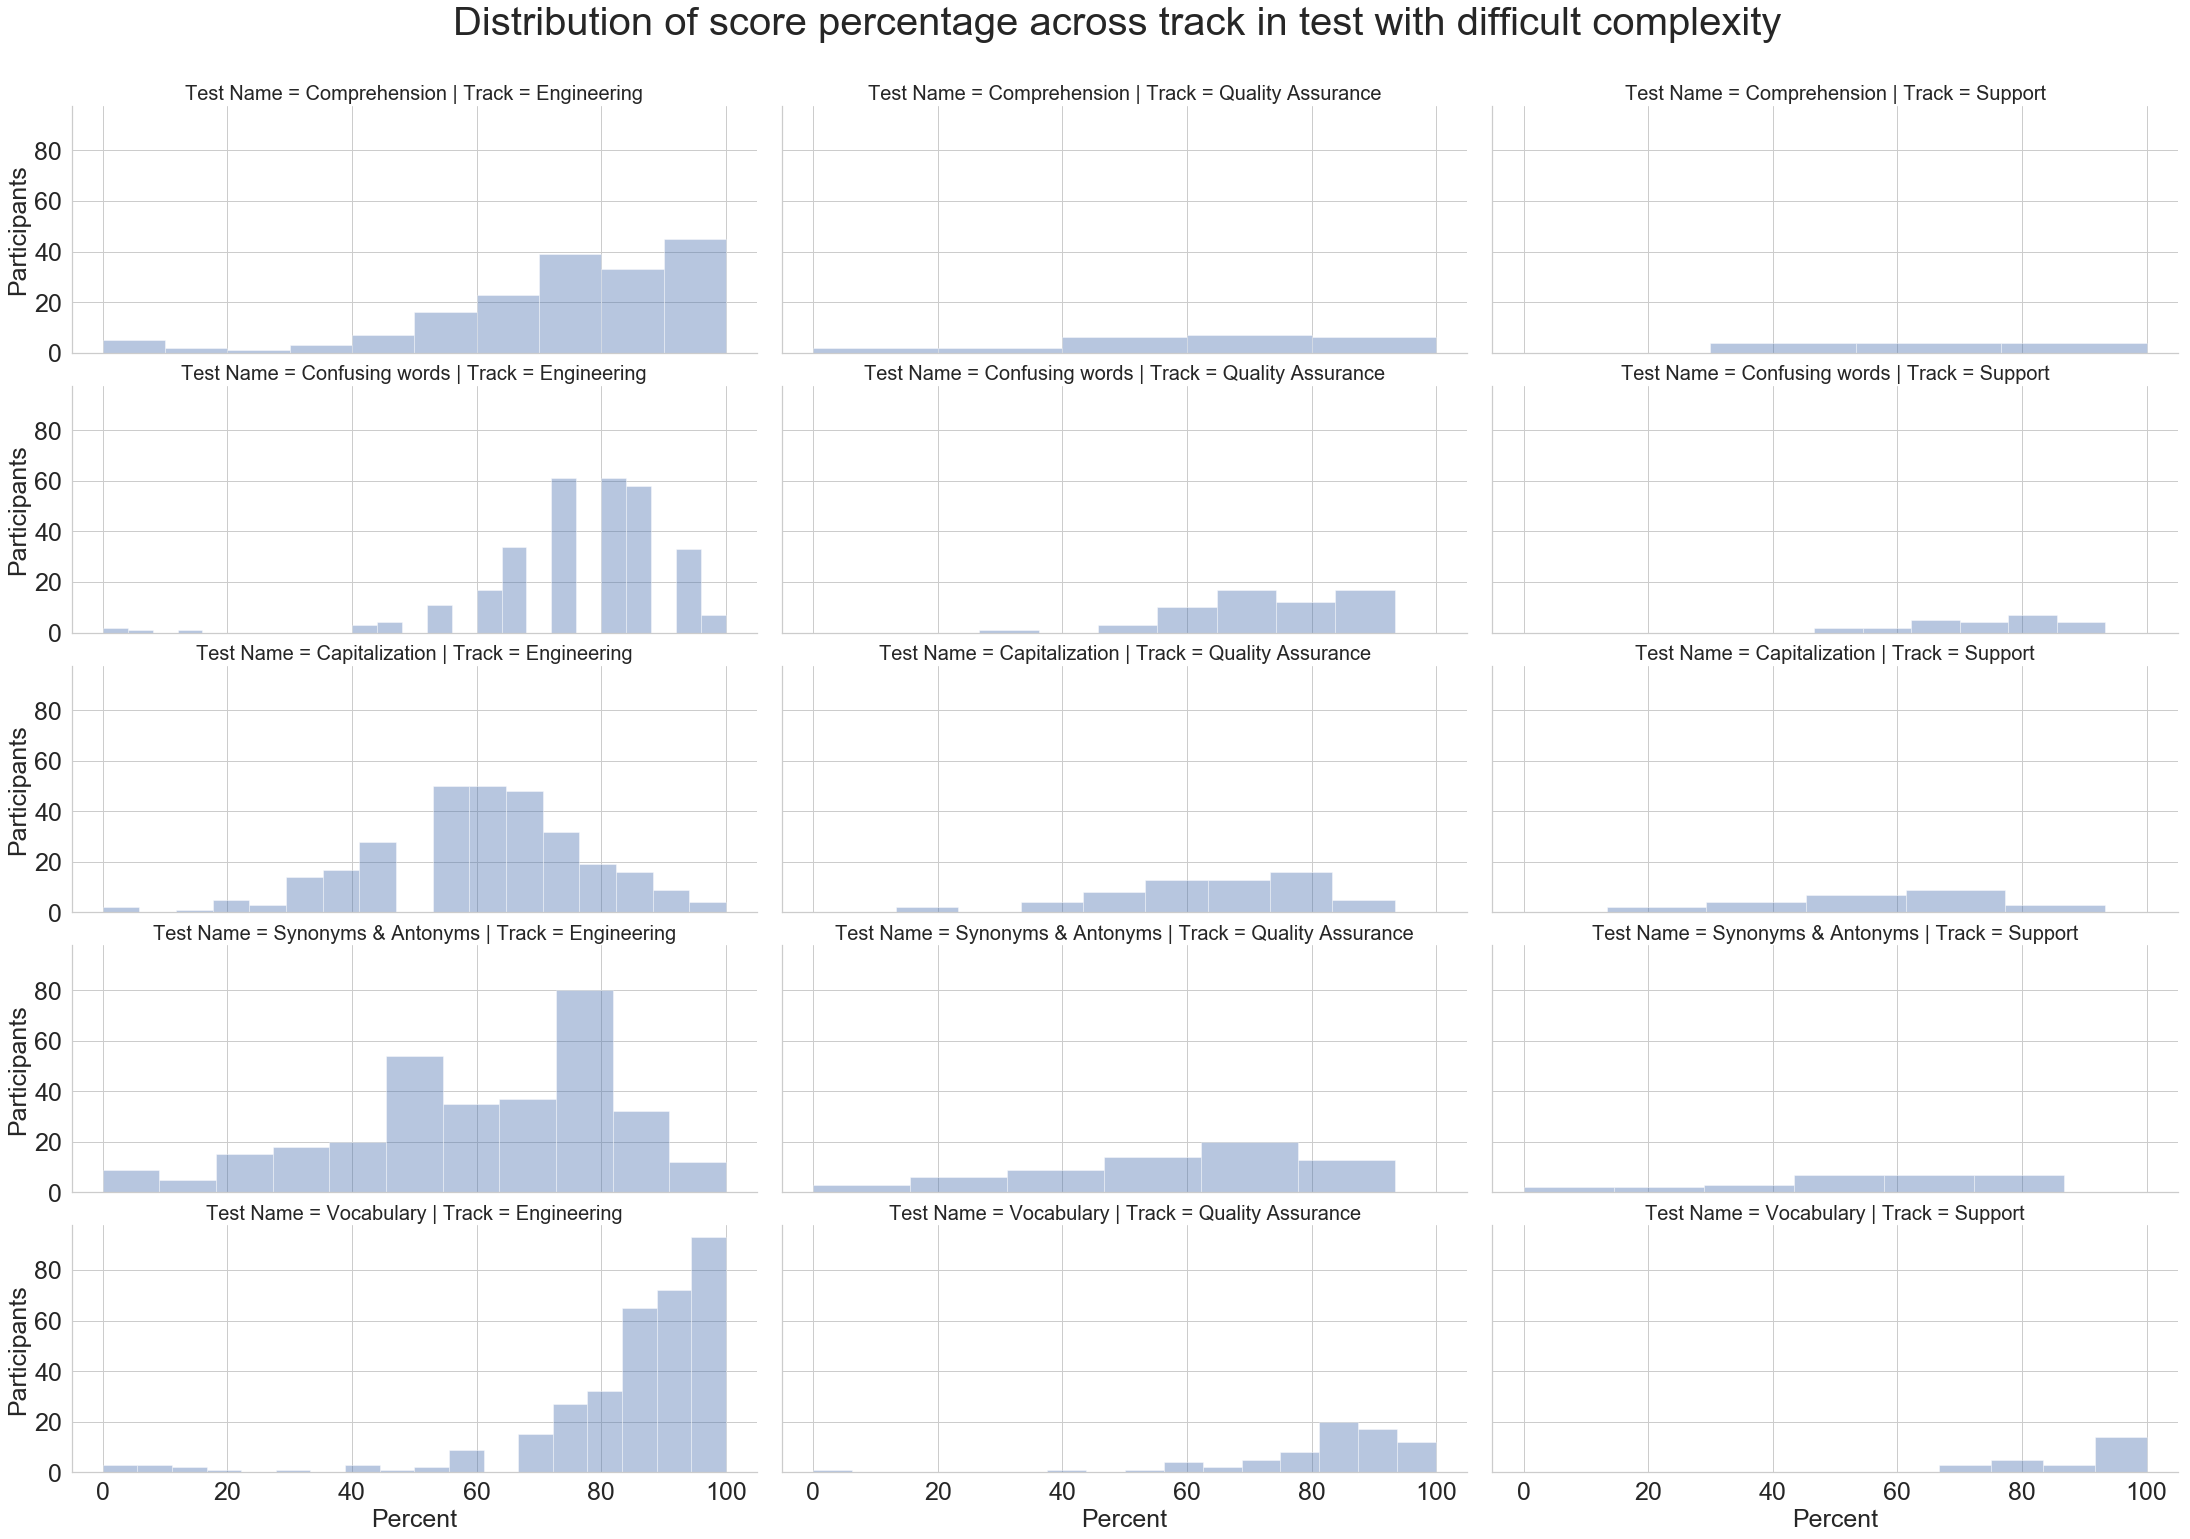

In [7]:
sns.set(style = "whitegrid")
g = sns.FacetGrid(test_scores_hard, col='Track', row='Test Name', height = 4, aspect =2.5)
g.map(sns.distplot, "Percent", kde = False, hist = True, rug = False)
g.set_titles(size =20)
g.set_xlabels(size = 25)
g.set_ylabels(size = 25, label = "Participants")
g.set_yticklabels(fontsize =25)
g.set_xticklabels(fontsize =25, labels = [0,0,20,40,60,80,100])
g.fig.suptitle('Distribution of score percentage across track in test with difficult complexity', fontsize=40, x = 0.5, y = 1.05)
#plb.savefig('Distribution_hard',dpi=50,bbox_inches='tight')